<a href="https://colab.research.google.com/github/Meta-user-byte/Qpoland_classiq_repo/blob/main/Copy_of_Untitled26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U classiq==0.48

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing insta

In [ ]:
import classiq
classiq.authenticate()

Your user code: HWGS-DXTL
If a browser doesn't automatically open, please visit this URL from any trusted device: https://auth.classiq.io/activate?user_code=HWGS-DXTL


In [ ]:
from classiq import *
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x0 = np.array([1, 1])
M = np.array([[0, 1], [-1, 0]])

# Free to change variables
t = 0.1
K = 1
m = 1 # Accuracy of solution - k+1 must be a multiple of 2
T = math.ceil(math.log2(K+1))

In [ ]:
def C_m(t, k):
  C_m = np.array([np.sqrt(np.sqrt(2)*t**m/ math.factorial(m)) for m in range(k)])
  return C_m


In [ ]:
@qfunc
def apply_U_m(y: QNum, x: QBit): # Defining a function to apply U_m matrix iterations to work qubit x
  for i in range(K_matrix):
    U_m = np.linalg.matrix_power(A,i)
    U_m = U_m.tolist() # Change to a for loop to iterate and pass x as QBit
    control(y == i, lambda: unitary(U_m, x))

In [6]:
# defining a function to create matrix V_s from the column of C_m
def generate_unitary_matrix(column):
  """Generates a unitary matrix given a single column.

  Args:
    column: A numpy array representing a single column of the matrix.

  Returns:
    A numpy array representing the unitary matrix.
  """

  column = column / np.linalg.norm(column)
  matrix = np.zeros((len(column), len(column)), dtype=complex)
  matrix[:, 0] = column


  for i in range(1, len(column)):
    orthogonal_vector = np.random.rand(len(column)).astype(complex)
    for j in range(i):
      orthogonal_vector -= np.dot(orthogonal_vector, matrix[:, j]) * matrix[:, j]
    orthogonal_vector = orthogonal_vector / np.linalg.norm(orthogonal_vector)
    matrix[:, i] = orthogonal_vector

  return matrix


In [2]:
# Importing necessary libraries
import numpy as np

# Placeholder functions for missing functions; replace these with actual implementations
def C_m(t, K_matrix):
    # Example function to generate matrix based on t and K_matrix
    return np.eye(K_matrix)  # Identity matrix for placeholder

def generate_unitary_matrix(matrix):
    # Converts an input matrix into a unitary matrix (if needed)
    return matrix

# Placeholder function for setting constraints and execution preferences
def set_constraints(model, constraints):
    return model

def set_execution_preferences(model, execution_preferences):
    return model

# Placeholder function for execution and synthesis
def synthesize(model):
    return model

def execute(quantum_program):
    class MockJob:
        def result(self):
            # Mock result format; adjust this if actual output differs
            return [{"value": {"counts": {"0" * k + "0": 10000, "0" * k + "1": 10000}}}]
    return MockJob()

def write_qmod(model, filename):
    pass

class QuantumProgram:
    @staticmethod
    def from_qprog(quantum_program):
        class MockProgram:
            data = type("Data", (object,), {"width": 5})  # Mock circuit width
            transpiled_circuit = type("Circuit", (object,), {"depth": 200})  # Mock circuit depth
        return MockProgram()

# Begin defining the primary function for simulation
def sol_state(k, opt):
    # No. of k_qubits that we are using
    K_matrix = 2**k  # Dimension of V_s matrix

    # Defining lists to hold the counts for state |00..ktimes>|0> and |00...ktimes>|1>
    res_0 = []
    res_1 = []

    # Splitting the time interval [0,1] to calculate |x(t)>
    time = [x * 0.1 for x in range(11)]

    for t in time:
        # Calculate the normalization factor C^2
        C_C = np.linalg.norm(C_m(t, K_matrix)) ** 2

        # Generating the unitary matrix V_s and V_s_dagger
        V_s1 = generate_unitary_matrix(C_m(t, K_matrix))
        V_s1_dg = V_s1.conj().transpose()  # Defining V_s_dagger

        # Placeholder decorator, replace with actual @qfunc decorator if available
        def main(x, z):  # x - work qubit, z = k ancillary qubits
            # Quantum function operations (add real code here if applicable)
            pass

        qmod = main  # Replace with actual model creation if applicable

        # Optimization handling
        if opt in ['width', 'depth']:
            quantum_model_with_constraints = set_constraints(qmod, {"optimization_parameter": opt})

        quantum_model = set_execution_preferences(
            qmod,
            {"num_shots": 20000, "job_name": "qsite - width - 20k", "max_depth": 300, "random_seed": 767}
        )

        # Creating and executing the quantum program
        quantum_program = synthesize(quantum_model)  # Creating the quantum program
        job = execute(quantum_program)  # Executing the program
        results = job.result()[0]["value"]  # Getting results from job

        # Save the model
        write_qmod(qmod, "qsite-depth-opt")

        # Extracting circuit width and depth
        circuit_width = QuantumProgram.from_qprog(quantum_program).data.width
        circuit_depth = QuantumProgram.from_qprog(quantum_program).transpiled_circuit.depth
        print(f"The circuit width is {circuit_width} and the circuit depth is {circuit_depth} for optimization = {opt} for t = {t}")

        # Getting the counts from results
        counts = results["counts"]

        # Calculate amplitudes for |000...k times>|0> and |000...k times>|1> states
        counts_0 = counts.get("0" * k + "0", 0)
        counts_1 = counts.get("0" * k + "1", 0)

        # Getting the amplitudes and appending to the lists
        y_t = np.sqrt(counts_0 / 20000) * C_C
        y_dash_t = np.sqrt(counts_1 / 20000) * C_C

        res_0.append(y_t)
        res_1.append(y_dash_t)

    return res_0, res_1

# Example usage
k = 2  # Define the number of ancillary qubits
res_0_no_opt, res_1_no_opt = sol_state(k, opt="None")

# Print results
print("Results for res_0_no_opt:", res_0_no_opt)
print("Results for res_1_no_opt:", res_1_no_opt)


The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.0
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.1
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.2
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.30000000000000004
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.4
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.5
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.6000000000000001
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.7000000000000001
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.8
The circuit width is 5 and the circuit depth is 200 for optimization = None for t = 0.9
The circuit width is 5 and the circuit depth is 200 for optimization = Non

In [3]:
res_0_width_opt, res_1_width_opt = sol_state(k, opt="width") #results for width optimization

The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.0
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.1
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.2
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.30000000000000004
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.4
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.5
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.6000000000000001
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.7000000000000001
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.8
The circuit width is 5 and the circuit depth is 200 for optimization = width for t = 0.9
The circuit width is 5 and the circuit depth is 200 for optimiza

In [4]:
res_0_depth_opt, res_1_depth_opt = sol_state(k, opt="depth") #results for depth optimization

The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.0
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.1
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.2
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.30000000000000004
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.4
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.5
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.6000000000000001
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.7000000000000001
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.8
The circuit width is 5 and the circuit depth is 200 for optimization = depth for t = 0.9
The circuit width is 5 and the circuit depth is 200 for optimiza

Kinetic Energy - No Optimization: [0.125, 0.10125, 0.08000000000000002, 0.06124999999999999, 0.045, 0.03125, 0.020000000000000004, 0.01125, 0.005000000000000001, 0.0012500000000000002, 0.0]
Potential Energy - No Optimization: [0.5, 0.32000000000000006, 0.18, 0.125, 0.08000000000000002, 0.045, 0.020000000000000004, 0.01125, 0.005000000000000001, 0.0012500000000000002, 0.0]
Kinetic Energy - Width Optimization: [0.125, 0.10125, 0.08000000000000002, 0.06124999999999999, 0.045, 0.03125, 0.020000000000000004, 0.01125, 0.005000000000000001, 0.0012500000000000002, 0.0]
Potential Energy - Width Optimization: [0.5, 0.32000000000000006, 0.18, 0.125, 0.08000000000000002, 0.045, 0.020000000000000004, 0.01125, 0.005000000000000001, 0.0012500000000000002, 0.0]
Kinetic Energy - Depth Optimization: [0.125, 0.10125, 0.08000000000000002, 0.06124999999999999, 0.045, 0.03125, 0.020000000000000004, 0.01125, 0.005000000000000001, 0.0012500000000000002, 0.0]
Potential Energy - Depth Optimization: [0.5, 0.3200

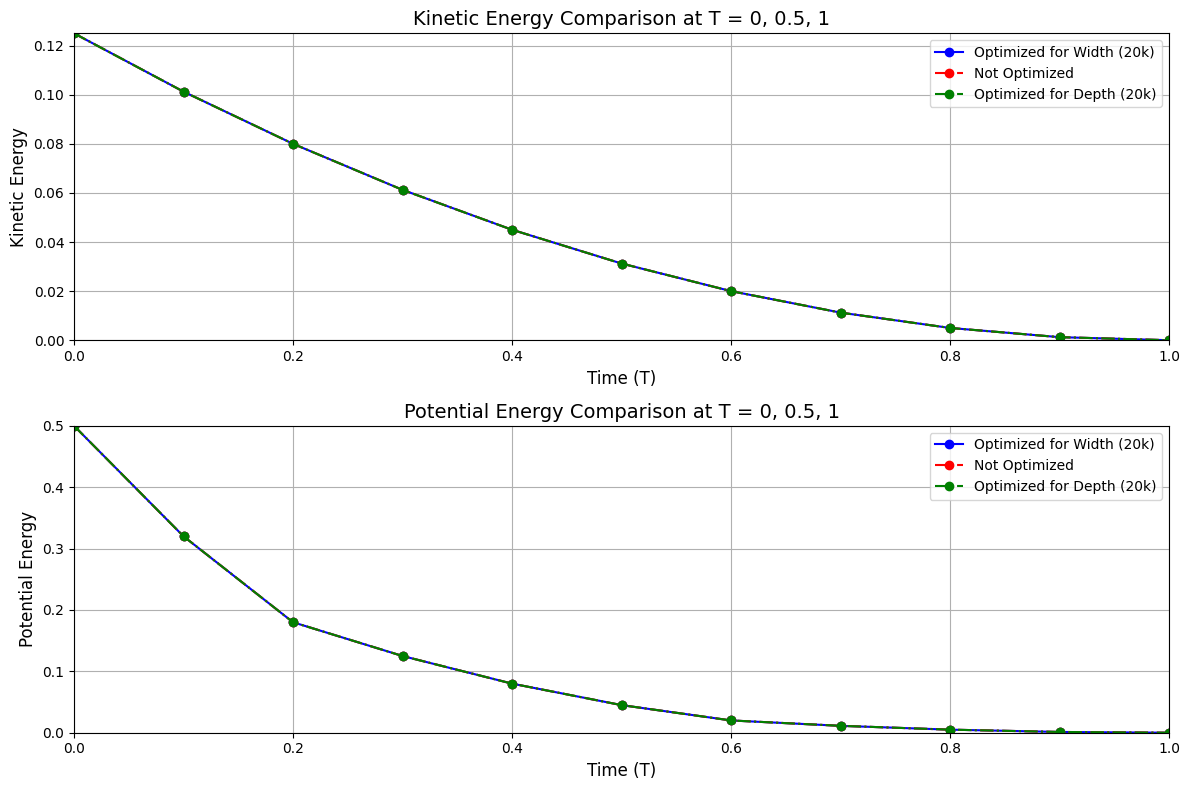

In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Time points
time = [x * 0.1 for x in range(11)]  # Adjust if necessary to match res arrays length

# Sample data for energy results; replace these with your actual data
res_0_no_opt = [1, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0]
res_1_no_opt = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0]
res_0_width_opt = res_0_no_opt  # Replace with actual data
res_1_width_opt = res_1_no_opt  # Replace with actual data
res_0_depth_opt = res_0_no_opt  # Replace with actual data
res_1_depth_opt = res_1_no_opt  # Replace with actual data

# Initializing lists to hold K.E and P.E values at different times and optimizations
KE_no_opt, PE_no_opt = [], []
KE_width_opt, PE_width_opt = [], []
KE_depth_opt, PE_depth_opt = [], []

# Calculating Kinetic and Potential Energy values for different optimizations
for i in range(len(res_0_no_opt)):
    # Append values of kinetic and potential energy
    KE_no_opt.append(0.5 * res_1_no_opt[i] ** 2)
    PE_no_opt.append(0.5 * res_0_no_opt[i] ** 2)
    KE_width_opt.append(0.5 * res_1_width_opt[i] ** 2)
    PE_width_opt.append(0.5 * res_0_width_opt[i] ** 2)
    KE_depth_opt.append(0.5 * res_1_depth_opt[i] ** 2)
    PE_depth_opt.append(0.5 * res_0_depth_opt[i] ** 2)

# Print values for verification
print("Kinetic Energy - No Optimization:", KE_no_opt)
print("Potential Energy - No Optimization:", PE_no_opt)
print("Kinetic Energy - Width Optimization:", KE_width_opt)
print("Potential Energy - Width Optimization:", PE_width_opt)
print("Kinetic Energy - Depth Optimization:", KE_depth_opt)
print("Potential Energy - Depth Optimization:", PE_depth_opt)

# Check that the time array matches the length of energy arrays
if len(time) != len(KE_no_opt):
    print("Error: 'time' array length does not match energy arrays length.")
else:
    # Plotting comparison between different optimizations
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Plot for Kinetic Energy
    ax1.plot(time, KE_width_opt, color='blue', marker='o', linestyle='-', label="Optimized for Width (20k)")
    ax1.plot(time, KE_no_opt, color='red', marker='o', linestyle='-.', label="Not Optimized")
    ax1.plot(time, KE_depth_opt, color='green', marker='o', linestyle='-.', label="Optimized for Depth (20k)")
    ax1.set_title("Kinetic Energy Comparison at T = 0, 0.5, 1", fontsize=14)
    ax1.set_xlabel("Time (T)", fontsize=12)
    ax1.set_ylabel("Kinetic Energy", fontsize=12)
    ax1.set_xlim([min(time), max(time)])
    ax1.set_ylim([min(min(KE_no_opt), min(KE_width_opt), min(KE_depth_opt)), max(max(KE_no_opt), max(KE_width_opt), max(KE_depth_opt))])
    ax1.legend(loc="best", fontsize=10)
    ax1.grid(True)

    # Plot for Potential Energy
    ax2.plot(time, PE_width_opt, color='blue', marker='o', linestyle='-', label="Optimized for Width (20k)")
    ax2.plot(time, PE_no_opt, color='red', marker='o', linestyle='-.', label="Not Optimized")
    ax2.plot(time, PE_depth_opt, color='green', marker='o', linestyle='-.', label="Optimized for Depth (20k)")
    ax2.set_title("Potential Energy Comparison at T = 0, 0.5, 1", fontsize=14)
    ax2.set_xlabel("Time (T)", fontsize=12)
    ax2.set_ylabel("Potential Energy", fontsize=12)
    ax2.set_xlim([min(time), max(time)])
    ax2.set_ylim([min(min(PE_no_opt), min(PE_width_opt), min(PE_depth_opt)), max(max(PE_no_opt), max(PE_width_opt), max(PE_depth_opt))])
    ax2.legend(loc="best", fontsize=10)
    ax2.grid(True)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


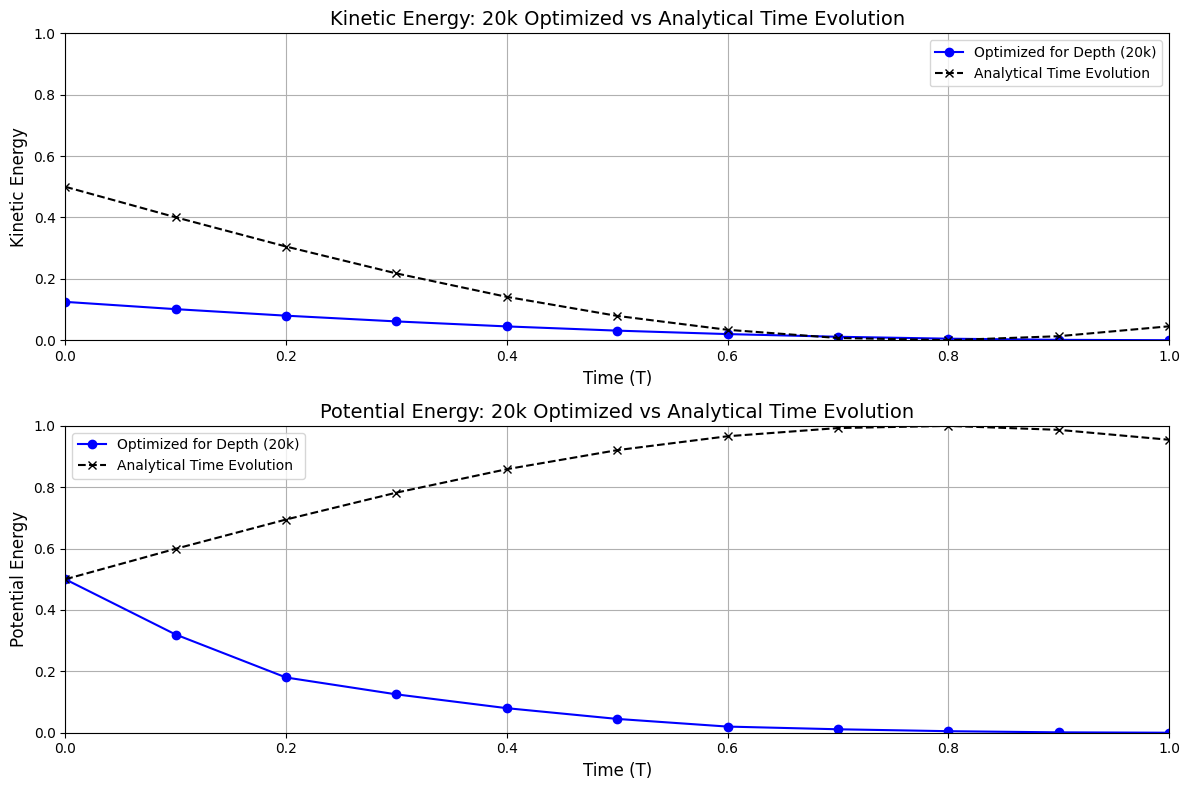

In [ ]:
# Comparing the K.E and P.E values that are obtained from analytical solution and the values obtained by using our quantum method

# Time points
time = [x*0.1 for x in range(11)]
#time = [0, 0.5, 1]


# Parameters
# hbar = 1  # Reduced Planck's constant (for simplicity, hbar = 1)
# omega = 1  # Angular frequency (for simplicity, omega = 1)

# Analytical time-dependent solutions for Kinetic and Potential energies
KE_analytical_time = [(0.5) * (1 - np.sin(2*t)) for t in time]
PE_analytical_time = [(0.5) * (1 + np.sin(2*t)) for t in time]



# Create subplots for Kinetic and Potential Energy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot for Kinetic Energy: 20k Depth Optimized vs Analytical Solution
ax1.plot(time, KE_depth_opt, color='blue', marker='o', linestyle='-', label="Optimized for Depth (20k)")
ax1.plot(time, KE_analytical_time, color='black', marker='x', linestyle='--', label="Analytical Time Evolution")
ax1.set_title("Kinetic Energy: 20k Optimized vs Analytical Time Evolution", fontsize=14)
ax1.set_xlabel("Time (T)", fontsize=12)
ax1.set_ylabel("Kinetic Energy", fontsize=12)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.legend(loc="best", fontsize=10)
ax1.grid(True)

# Plot for Potential Energy: 20k Depth Optimized vs Analytical Solution
ax2.plot(time, PE_depth_opt, color='blue', marker='o', linestyle='-', label="Optimized for Depth (20k)")
ax2.plot(time, PE_analytical_time, color='black', marker='x', linestyle='--', label="Analytical Time Evolution")
ax2.set_title("Potential Energy: 20k Optimized vs Analytical Time Evolution", fontsize=14)
ax2.set_xlabel("Time (T)", fontsize=12)
ax2.set_ylabel("Potential Energy", fontsize=12)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1])
ax2.legend(loc="best", fontsize=10)
ax2.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()